<h5>Descriptive Analysis</h5>

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
from transformers import AutoTokenizer, AutoModel
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import torch
import nltk
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string
from wordcloud import WordCloud
from nltk import bigrams
from nltk.collocations import BigramAssocMeasures
from nltk.probability import FreqDist
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# visualization
import pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import networkx as nx
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
from transformers import AutoTokenizer, AutoModel
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import torch
import nltk
from lazypredict.Supervised import LazyClassifier
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string
from wordcloud import WordCloud
from nltk import bigrams
from nltk.collocations import BigramAssocMeasures
from nltk.probability import FreqDist
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# visualization
import pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import networkx as nx
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import loguniform
import seaborn as sns
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm



In [3]:
df = pd.read_excel('Labeld data.xlsx')
df

,AP,Ariadne_internal_ID,content,cnt,VVL Mobile,VVL DSL,PO GA,I@H GA,TV GA,OOC (out of category),Comment,Conditional Formatting
0,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77b26-64e3046f-1555...,Herzlich willkommen beim O Kundenservice mein ...,54,False,False,False,False,False,False,NaN,0
1,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d03-64e3074a-24e4...,Guten Morgen bei O sie sprechen mit Alexandra ...,61,False,False,True,False,False,False,NaN,1
2,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d06-64e3074a-6d7f...,Ackermann fertig willkommen bei O sie sprechen...,62,False,False,False,False,False,False,NaN,0
3,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d0f-64e30753-8296...,Herzlich willkommen im O Service mein Name ist...,63,False,False,False,False,False,False,NaN,0
4,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d1e-64e30771-785f...,Guten Morgen herzlich willkommen bei O sie spr...,64,False,False,True,False,False,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7a9ba-64e4bc6b-797e...,Schönen guten Tag herzlich willkommen bei O hi...,3440,False,False,False,False,False,False,NaN,0
1117,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7aa4a-64e4c0fe-55cb...,Herzlich willkommen bei blau sie sprechen mit ...,3441,False,False,False,False,False,False,NaN,0
1118,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7aa5c-64e4c193-dba3...,Schönen guten Tag und herzlich willkommen bei ...,3442,False,False,False,False,False,False,NaN,0
1119,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7aa62-64e4c1ab-7103...,Herzlich willkommen bei Rermodus Service Mutz ...,3443,False,False,False,False,False,False,NaN,0


In [4]:
# Check for missing data in the entire DataFrame
missing_data = df.isnull().sum()

# Print missing data counts for each column
print("Missing Data Counts:")
print(missing_data)


Missing Data Counts:
AP                           0
Ariadne_internal_ID          0
content                      0
cnt                          0
VVL Mobile                   0
VVL DSL                      0
PO GA                        0
I@H GA                       0
TV GA                        0
OOC (out of category)        0
Comment                   1121
Conditional Formatting       0
dtype: int64


In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [AP, Ariadne_internal_ID, content, cnt, VVL Mobile, VVL DSL, PO GA, I@H GA, TV GA, OOC (out of category), Comment, Conditional Formatting]
Index: []


In [6]:
# Split the 'content' column into words and calculate word counts
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Calculate the average word count
average_word_count = df['word_count'].mean()

# Print the average word count
print("Average Word Count:", average_word_count)

# Calculate the average word count
average_word_count_median = df['word_count'].median()

# Print the average word count
print("Median Word Count:", average_word_count_median)


# Print the max word count
print("Max Word Count:", df['word_count'].max())

# Print the min word count
print("Min Word Count:", df['word_count'].min())



Average Word Count: 567.3612845673506
Median Word Count: 414.0
Max Word Count: 3917
Min Word Count: 37


In [24]:
# Frequency counts for categorical columns
counts_1 = df['VVL Mobile'].value_counts()
counts_1
counts_2 = df['VVL DSL'].value_counts()
counts_2
counts_3 = df['PO GA'].value_counts()
counts_3
counts_4 = df['I@H GA'].value_counts()
counts_4
counts_5 = df['TV GA'].value_counts()
counts_5


TV GA
False    1108
True       13
Name: count, dtype: int64

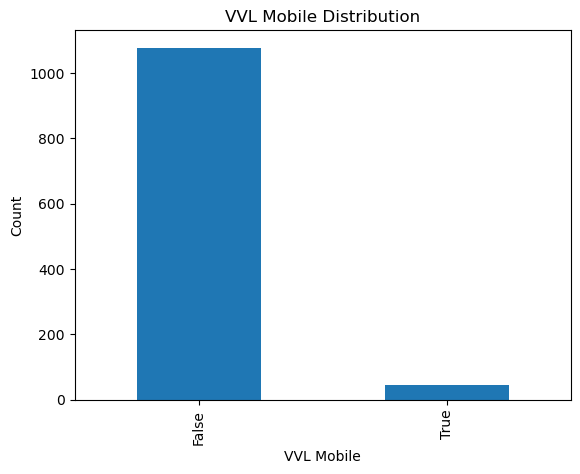

In [26]:
# Bar chart for counts
counts_1.plot(kind='bar')
plt.xlabel('VVL Mobile')
plt.ylabel('Count')
plt.title('VVL Mobile Distribution')
plt.show()

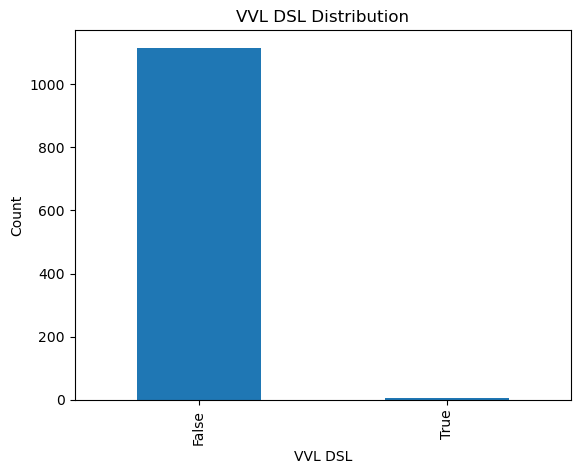

In [27]:
counts_2.plot(kind='bar')
plt.xlabel('VVL DSL')
plt.ylabel('Count')
plt.title('VVL DSL Distribution')
plt.show()

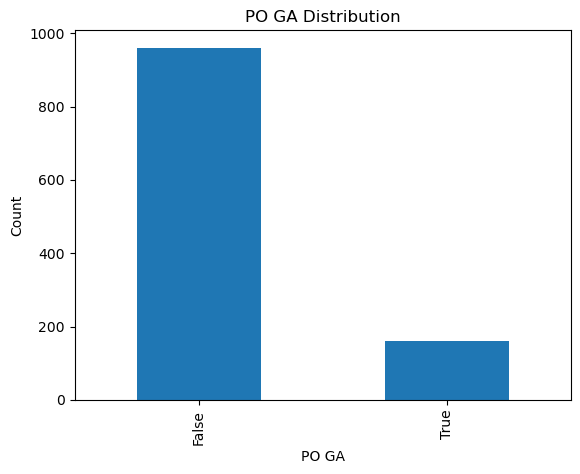

In [28]:
counts_3.plot(kind='bar')
plt.xlabel('PO GA')
plt.ylabel('Count')
plt.title('PO GA Distribution')
plt.show()

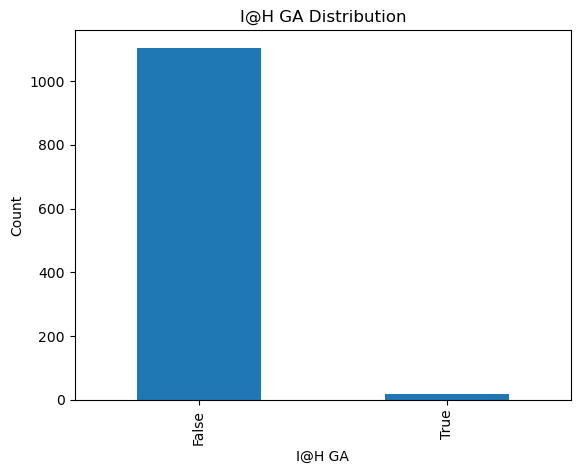

In [29]:
counts_4.plot(kind='bar')
plt.xlabel('I@H GA')
plt.ylabel('Count')
plt.title('I@H GA Distribution')
plt.show()

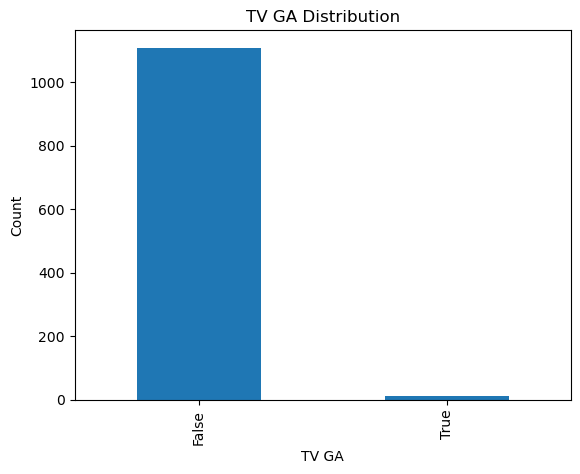

In [30]:
counts_5.plot(kind='bar')
plt.xlabel('TV GA')
plt.ylabel('Count')
plt.title('TV GA Distribution')
plt.show()

In [7]:


# Find the text with the minimum number of words
min_word_count = df['word_count'].min()
min_word_text = df[df['word_count'] == min_word_count]['content'].values[0]

# Print the text with the minimum word count
print("Text with the Minimum Number of Words:")
print(min_word_text)

# Optionally, you can also print the word count for reference
print(f"Word Count: {min_word_count}")


Text with the Minimum Number of Words:
Schönen guten Tag und willkommen bei Uto hier ist die Marie wie kann ich ihnen helfen
Ja
Ja
Also wir kommen sie kein Leisten gut ihre aktuelle Anschluss von uns
Hallo hallo
Hallo hallo
Hallo hallo
Hallo

Word Count: 37


In [23]:
som_counts = df['SOM'].value_counts()
som_counts

SOM
SOM    64535
Name: count, dtype: int64

In [8]:
df.describe()

,cnt,Comment,Conditional Formatting,word_count
count,1121.000000,0.0,1121.000000,1121.000000
mean,2523.580731,NaN,0.214987,567.361285
std,1062.535234,NaN,0.444398,500.318692
min,54.000000,NaN,0.000000,37.000000
25%,2602.000000,NaN,0.000000,242.000000
50%,2882.000000,NaN,0.000000,414.000000
75%,3164.000000,NaN,0.000000,713.000000
max,3444.000000,NaN,2.000000,3917.000000


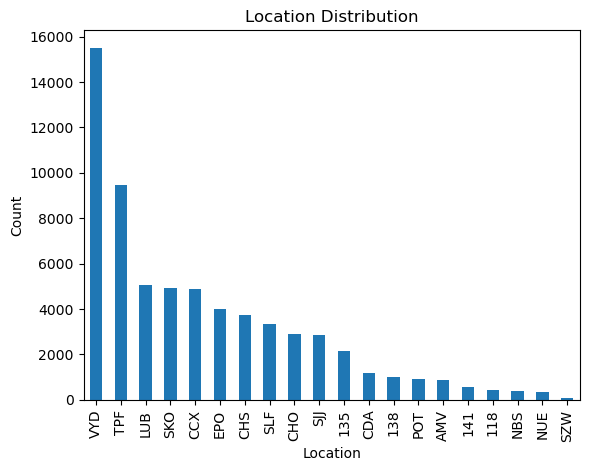

In [25]:
# Bar chart for location counts
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.show()

In [9]:
# Load the spaCy German language model
nlp = spacy.load('de_core_news_sm')
# Create an empty list to store the updated text without proper names
updated_texts = []
# Iterate over the text column and remove proper names using spaCy
for text in df['content']:
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.pos_ != 'PROPN':
            tokens.append(token.text)
    updated_texts.append(' '.join(tokens))
# Update the 'text' column with the modified text
df['content'] = updated_texts

# Print the updated dataset
df.head()

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

,AP,Ariadne_internal_ID,content,cnt,VVL Mobile,VVL DSL,PO GA,I@H GA,TV GA,OOC (out of category),Comment,Conditional Formatting,word_count
0,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77b26-64e3046f-1555...,Herzlich willkommen beim O Kundenservice mein ...,54,False,False,False,False,False,False,NaN,0,1980
1,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d03-64e3074a-24e4...,Guten Morgen bei sie sprechen mit sind Router ...,61,False,False,True,False,False,False,NaN,1,103
2,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d06-64e3074a-6d7f...,fertig willkommen bei sie sprechen mit was kan...,62,False,False,False,False,False,False,NaN,0,654
3,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d0f-64e30753-8296...,Herzlich willkommen im Service mein Name ist w...,63,False,False,False,False,False,False,NaN,0,272
4,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d1e-64e30771-785f...,Guten Morgen herzlich willkommen bei sie sprec...,64,False,False,True,False,False,False,NaN,1,492


In [10]:
# Download the NLTK stop words list and wordnet for lemmatization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the Snowball stemmer and WordNet lemmatizer
stemmer = SnowballStemmer("german")  # Use the appropriate language for stemming
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('german'))  # Use the appropriate language
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove short words (length < 3 characters)
    tokens = [word for word in tokens if len(word) > 2]
    
    # Lemmatize or stem the words
    # Uncomment one of the following lines based on your choice
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the preprocessing function to the DataFrame
df['content'] = df['content'].apply(preprocess_text)

# Print the cleaned DataFrame
print(df['content'])


[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       herzlich willkomm beim kundenservic nam gruss ...
1       gut morg sprech rout helf geht angegeb rufnumm...
2       fertig willkomm sprech tun handy abgeschloss v...
3       herzlich willkomm servic nam darf tun herr bit...
4       gut morg herzlich willkomm sprech valeri versc...
                              ...                        
1116    schon gut tag herzlich willkomm vertragsverlan...
1117    herzlich willkomm blau sprech herrn leid tun m...
1118    schon gut tag herzlich willkomm nam bestellhot...
1119    herzlich willkomm rermodus oll nam helf bitt m...
1120    schon gut tag herzlich willkomm beim bestell s...
Name: content, Length: 1121, dtype: object


In [11]:
# Words to remove
words_to_remove = ['bitt', 'mal', 'schon', 'genau', 'dank', 'gut', 'tag', 'numm', 'person', 'kurz', 
                   'einfach', 'neu', 'schau', 'moment', 'sag', 'muss', 'geht', 'fall', 'ganz', 'war', 'gern', 'frag', 
                   'gleich',
                  'guck', 'imm', 'halt', 'wurd', 'seh', 'natur', 'quasi', 'gerad', 'bekomm', 'rout', 'gesagt', 'nein', 
                   'tun', 'syst',
                  'mehr', 'mocht', 'box', 'geh', 'zugangsdat', 'passwort', 'kennwort', 'steht','seit', 'klein', 'bekomm', 'rufnumm', 
                   'kundenkennzahl', 'leid', 'tun', 'nam', 'per', 'willkomm', 'herzlich', 'gemacht', 'bleib', 'herr',
                   'kolleg',
                   'schick', 'frau', 'geb', 'richtig', 'vielleicht', 'viel','kart', 'brot', 'brauch',
                  'erst', 'gibt', 'kommt', 'moglich',  'pro', 'iphon', 'sekund', 'minut', 'wirklich', 'krieg',
                   'tatsach', 'musst', 'weiss',  'darf', 'find', 'gar', 'probl' , 'nee', 'klar', 'tschuss', 'heut', 'uhr', 'anruf', 
                   'wunsch', 'dat' , 'hallo', 'kundig']

# Function to remove specified words from text
def remove_specific_words(text):
    # Tokenize the text
    tokens = text.split()
    
    # Filter out words to remove
    filtered_tokens = [word for word in tokens if word not in words_to_remove]
    
    # Join the remaining tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

# Apply the function to the 'cleaned_text' column
df['content'] = df['content'].apply(remove_specific_words)

# Print the cleaned DataFrame
df['content']


0       beim kundenservic gruss gott perfekt funfzig l...
1       morg sprech helf angegeb vertragsinhab wart mu...
2       fertig sprech handy abgeschloss vertrag buchst...
3       servic blind planung irgendwann faruk myhom ir...
4       morg sprech valeri verschenk internet pruf kra...
                              ...                        
1116    vertragsverlanger wart eigent pass freigeschal...
1117    blau sprech herrn morg tut handy funktioniert ...
1118    bestellhotlin konnt eigent sich bess versorgt ...
1119    rermodus oll helf august bestellt raus lauf so...
1120    beim bestell servic hof tarif verlangerungspha...
Name: content, Length: 1121, dtype: object

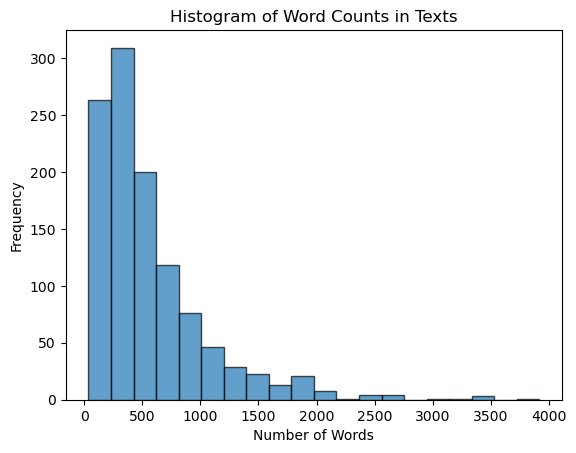

In [22]:
# Create a histogram of the word counts
plt.hist(df['word_count'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Texts')
plt.show()


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


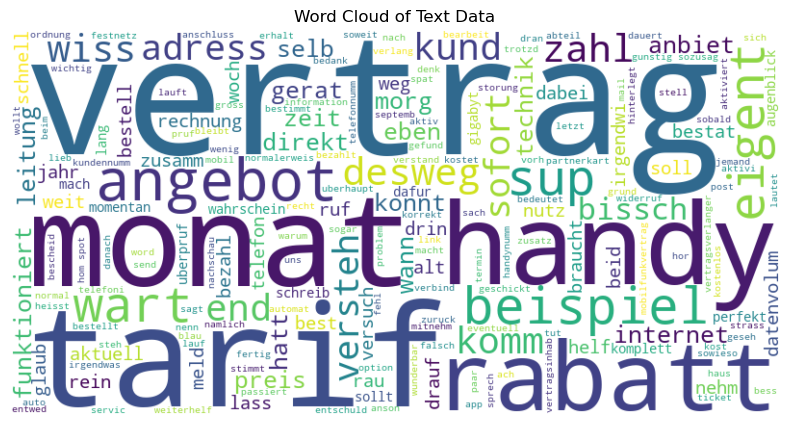

In [12]:
# Combine all text data into a single string
text_data = " ".join(df['content'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Data")
plt.show()


<h6>Topic Modeling</h6>

In [20]:
# Tokenize the text and create a dictionary
def tokenize(text):
    return text.split()

texts_content = [tokenize(text) for text in df['content']]

# Create a dictionary from the tokenized text
dictionary_content = corpora.Dictionary(texts_content)

# Create document-term matrices
corpus_content = [dictionary_content.doc2bow(text) for text in texts_content]

# Perform LDA
num_topics =5
lda_model_content = gensim.models.LdaModel(corpus=corpus_content, id2word=dictionary_content, num_topics=num_topics)

# Print topics for the 'content' DataFrame
print("Topics for the 'content' DataFrame:")
print(lda_model_content.print_topics(num_words=5))


Topics for the 'content' DataFrame:
[(0, '0.012*"monat" + 0.011*"tarif" + 0.007*"vertrag" + 0.006*"end" + 0.005*"zahl"'), (1, '0.013*"vertrag" + 0.008*"tarif" + 0.007*"monat" + 0.007*"versteh" + 0.006*"angebot"'), (2, '0.020*"tarif" + 0.015*"vertrag" + 0.012*"monat" + 0.009*"rechnung" + 0.007*"angebot"'), (3, '0.012*"vertrag" + 0.008*"monat" + 0.006*"sup" + 0.006*"desweg" + 0.006*"wart"'), (4, '0.026*"vertrag" + 0.013*"monat" + 0.009*"tarif" + 0.009*"handy" + 0.008*"rabatt"')]


In [17]:
# Evaluation
# Compute Perplexity
print('\nContent Perplexity: ', lda_model_content.log_perplexity(corpus_content))  
# a measure of how good the model is. lower the better.


Content Perplexity:  -7.514518267070694


In [18]:
# Compute Coherence Score for lda_model_content
coherence_model_content = CoherenceModel(model=lda_model_content, texts=texts_content, dictionary=dictionary_content, coherence='c_v')
coherence_content = coherence_model_content.get_coherence()
print('\nContent Coherence Score: ', coherence_content)



Content Coherence Score:  0.2613173582853161


In [23]:
# Assuming you have already imported the necessary libraries and defined lda_model_content, corpus_content, and dictionary_content

# Enable notebook mode (if you're using a Jupyter notebook)
pyLDAvis.enable_notebook()

# Prepare and display the visualization
vis_content = gensimvis.prepare(lda_model_content, corpus_content, dictionary_content)
vis_content


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.000473  0.010072       1        1  44.143789
0     -0.000471 -0.006047       2        1  16.435622
1     -0.007676  0.009479       3        1  15.440288
3     -0.012085 -0.010425       4        1  12.575084
2      0.019759 -0.003079       5        1  11.405217, topic_info=         Term         Freq        Total Category  logprob  loglift
219     tarif  1296.000000  1296.000000  Default  30.0000  30.0000
476  rechnung   567.000000   567.000000  Default  29.0000  29.0000
763     monat  1435.000000  1435.000000  Default  28.0000  28.0000
241   vertrag  2282.000000  2282.000000  Default  27.0000  27.0000
19    angebot   647.000000   647.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
58     bewert    49.294556   525.469525   Topic5  -5.7064  -0.1954
450    bestat    45.746521   468.018122   Topic5  -5.7811  -0.1543
80     eigent    45.697962   477.202732   Topic5  -5.7822  -0.1748
203      selb    42.544449   363.729374   Topic5  -5.8537   0.0252
251      wart    44.925640   526.965271   Topic5  -5.7992  -0.2910

[451 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5184      5  0.557658     abbieg
0         1  0.355660  abgelehnt
0         2  0.177830  abgelehnt
0         3  0.316142  abgelehnt
0         4  0.059277  abgelehnt
...     ...       ...        ...
995       1  0.564862     zusatz
995       2  0.110861     zusatz
995       3  0.100303     zusatz
995       4  0.121419     zusatz
995       5  0.105582     zusatz

[1013 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


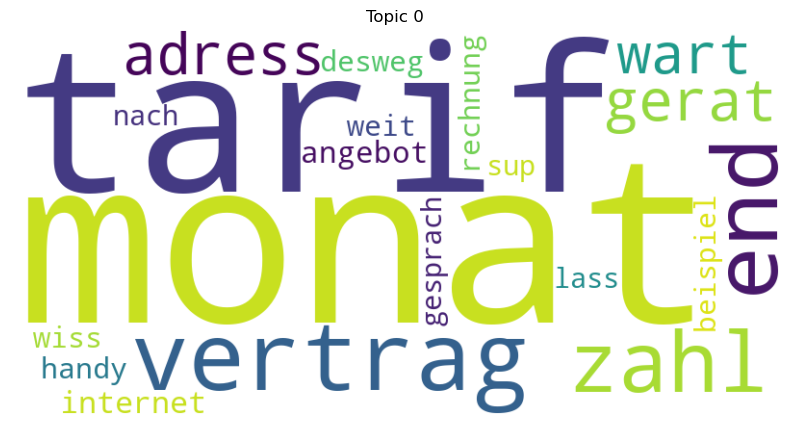

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


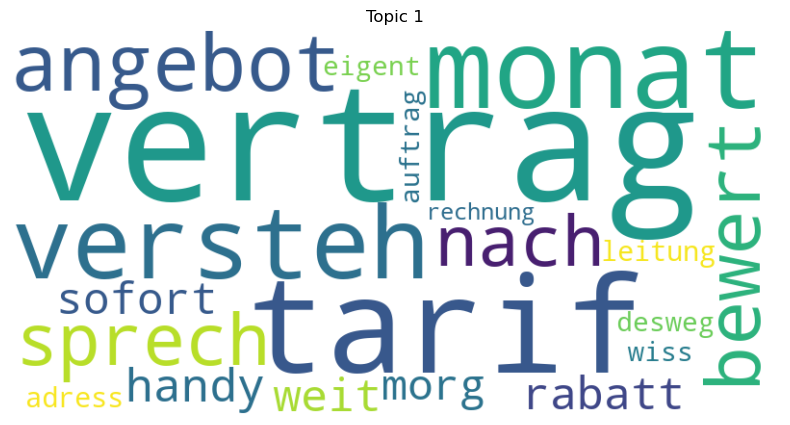

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


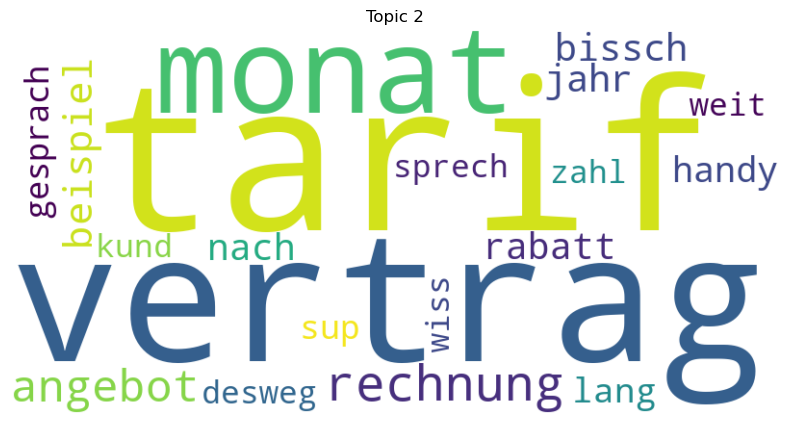

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


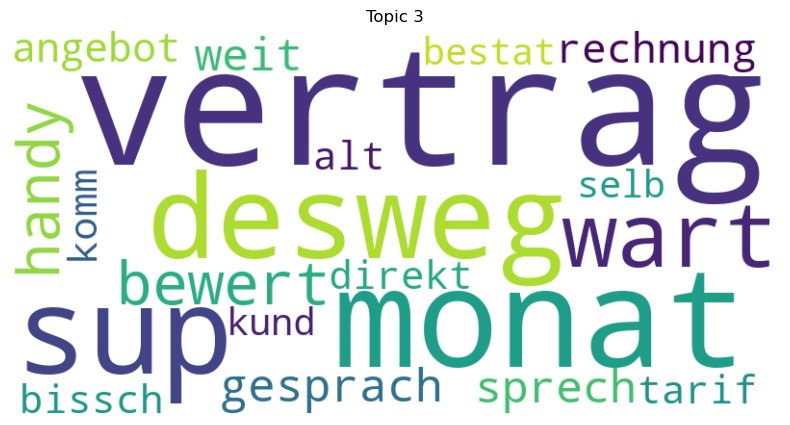

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


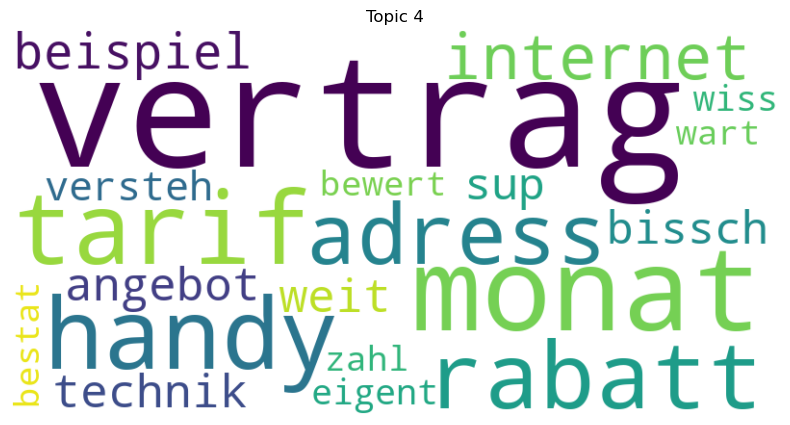

In [21]:
# Create a function to generate and display word clouds for each topic
def generate_word_clouds(lda_model, num_topics):
    for topic_num in range(num_topics):
        words = lda_model.show_topic(topic_num, topn=20)  # Get the top 20 words for each topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic {topic_num}")
        plt.axis("off")
        plt.show()

# Assuming you have already defined lda_model_content and num_topics
generate_word_clouds(lda_model_content, num_topics)


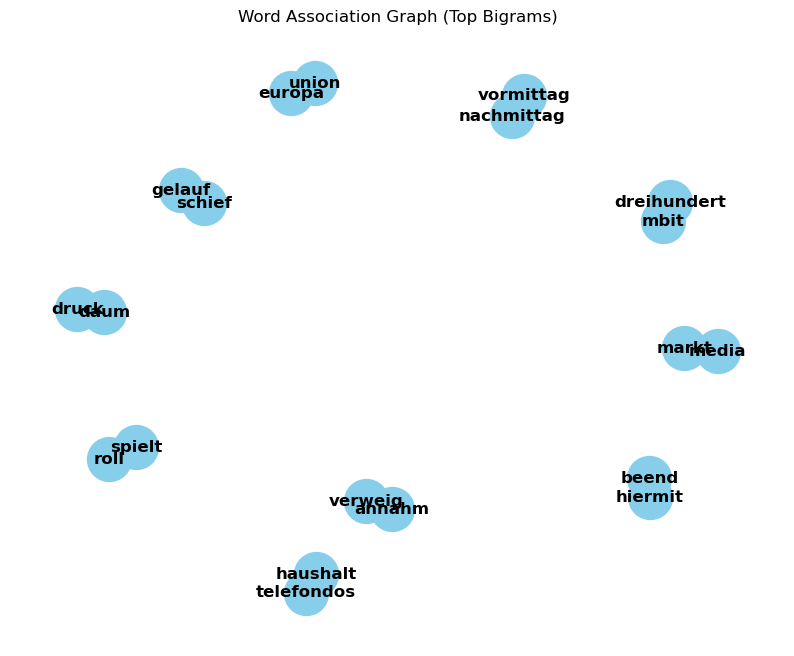

In [19]:
# Assuming you have a list of tokenized texts stored in 'texts_content'
# Join the tokens back into sentences
sentences = [' '.join(tokens) for tokens in texts_content]

# Tokenize the sentences again (if needed)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create a BigramCollocationFinder
finder = BigramCollocationFinder.from_documents(tokenized_sentences)

# Set the association measure (you can adjust this)
bigram_measures = BigramAssocMeasures()
finder.apply_freq_filter(5)  # Adjust the frequency filter as needed

# Get the top bigrams
top_bigrams = finder.nbest(bigram_measures.pmi, 10)  # You can change the number of top bigrams

# Create a graph to represent word associations
G = nx.Graph()

# Add nodes and edges for the bigrams
for bigram in top_bigrams:
    word1, word2 = bigram
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2)

# Create a figure and axis explicitly
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Define layout for the nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color='skyblue', font_color='black', font_weight='bold', ax=ax)
plt.title("Word Association Graph (Top Bigrams)")
plt.show()


In [34]:
features = ['content']
targets = ['VVL Mobile', 'VVL DSL', 'PO GA','I@H GA', 'TV GA']
X_train, X_test = train_test_split(df[features + targets], test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

896 225


In [36]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train["content"])
test_vectors = vectorizer.transform(X_test["content"])
print(train_vectors.shape, test_vectors.shape)

(896, 6929) (225, 6929)


In [37]:
# Define hyperparameter grid
alpha_range = loguniform(1e-2,1e1)
parameter_grid = {'alpha':alpha_range, 'norm':[True, False]}
randomsearch_CNB = ComplementNB()
randomsearch_clf = RandomizedSearchCV(randomsearch_CNB, parameter_grid,cv=10,scoring = "roc_auc", n_iter=50)
df_res = pd.DataFrame()

In [38]:
# Train all targets independently from one another
# and store relevant results in data frame for later comparison

for target_id in range(len(targets)):
    randomsearch_clf.fit(train_vectors,X_train[targets[target_id]])
    
    class_rep = classification_report(randomsearch_clf.best_estimator_.predict(test_vectors),X_test[targets[target_id]],output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf.best_estimator_.get_params())
    res["model"] = "ComplementNB"
    df_res = pd.concat((df_res,res), ignore_index=True)

VVL Mobile
{'alpha': 0.010880761873571114, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': False}
VVL DSL
{'alpha': 1.5111673126336522, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': True}
PO GA
{'alpha': 0.01058371480260685, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': True}
I@H GA
{'alpha': 0.019024705310508462, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': False}
TV GA
{'alpha': 0.13547823339636167, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': False}


In [40]:
from sklearn.metrics import confusion_matrix

# Initialize an empty dataframe to store results
df_res = pd.DataFrame()

for target_id in range(len(targets)):
    randomsearch_clf.fit(train_vectors, X_train[targets[target_id]])

    # Get predictions on the test set
    predictions = randomsearch_clf.best_estimator_.predict(test_vectors)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(X_test[targets[target_id]], predictions)

    # Display the confusion matrix
    print(f"Confusion Matrix for {targets[target_id]}:")
    print(conf_matrix)

    # Continue with the rest of the code for classification report and accuracy calculation
    class_rep = classification_report(predictions, X_test[targets[target_id]], output_dict=True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    # Add target and model information to the dataframe
    res["target"] = targets[target_id]
    res["model"] = "ComplementNB"

    # Concatenate the results to the main dataframe
    df_res = pd.concat((df_res, res), ignore_index=True)


Confusion Matrix for VVL Mobile:
[[207   4]
 [ 14   0]]
Confusion Matrix for VVL DSL:
[[223   0]
 [  2   0]]
Confusion Matrix for PO GA:
[[136  52]
 [ 18  19]]
Confusion Matrix for I@H GA:
[[222   2]
 [  0   1]]
Confusion Matrix for TV GA:
[[218   1]
 [  6   0]]


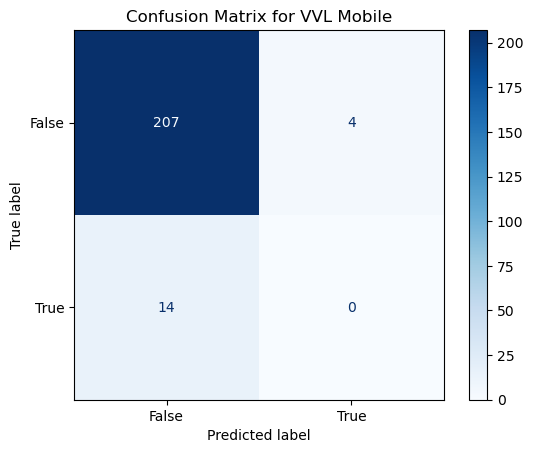

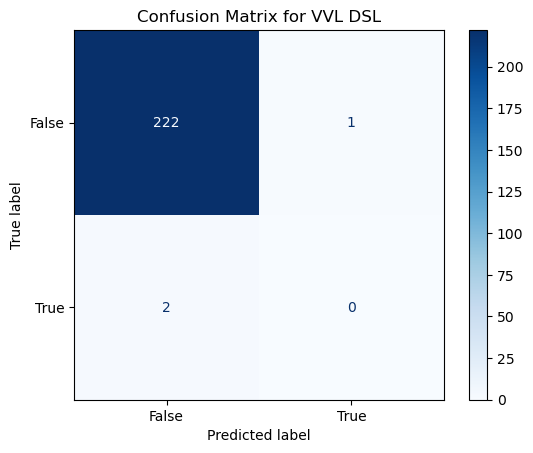

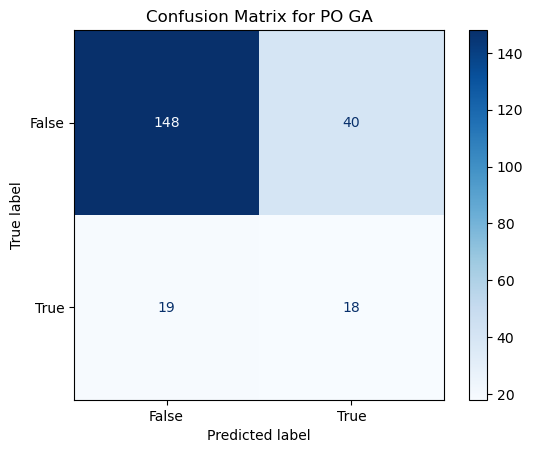

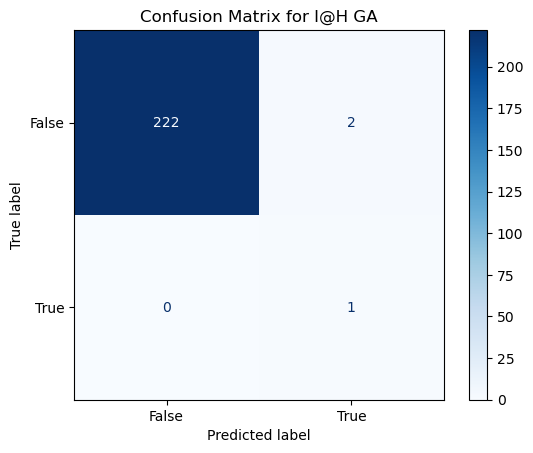

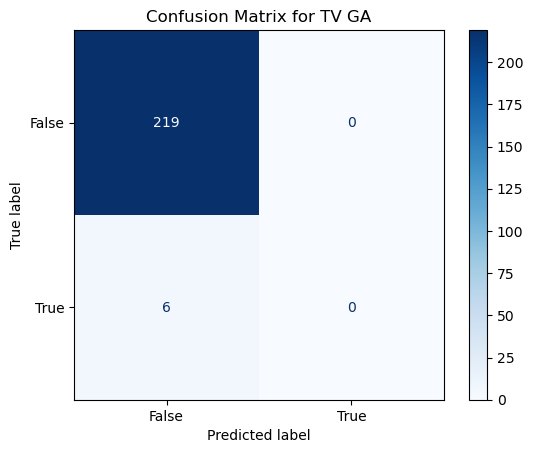

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize an empty dataframe to store results
df_res = pd.DataFrame()

for target_id in range(len(targets)):
    randomsearch_clf.fit(train_vectors, X_train[targets[target_id]])

    # Get predictions on the test set
    predictions = randomsearch_clf.best_estimator_.predict(test_vectors)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(X_test[targets[target_id]], predictions)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["False", "True"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {targets[target_id]}')
    plt.show()

    # Continue with the rest of the code for classification report and accuracy calculation
    class_rep = classification_report(predictions, X_test[targets[target_id]], output_dict=True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    # Add target and model information to the dataframe
    res["target"] = targets[target_id]
    res["model"] = "ComplementNB"

    # Concatenate the results to the main dataframe
    df_res = pd.concat((df_res, res), ignore_index=True)


<Figure size 800x600 with 0 Axes>

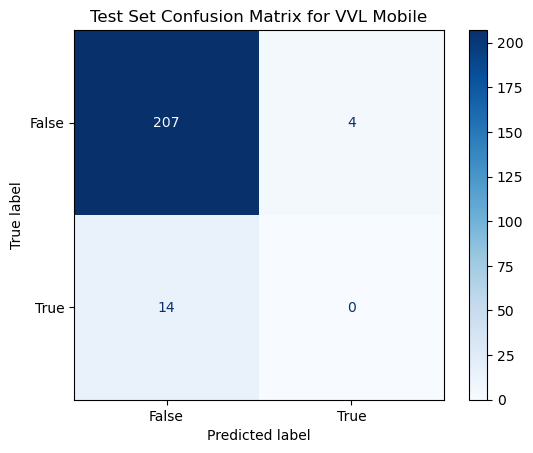

Training Set Confusion Matrix for VVL Mobile:
[[859   7]
 [  0  30]]
Test Set Confusion Matrix for VVL Mobile:
[[207   4]
 [ 14   0]]
Overall Confusion Matrix for VVL Mobile:
[[207   4]
 [ 14   0]]


<Figure size 800x600 with 0 Axes>

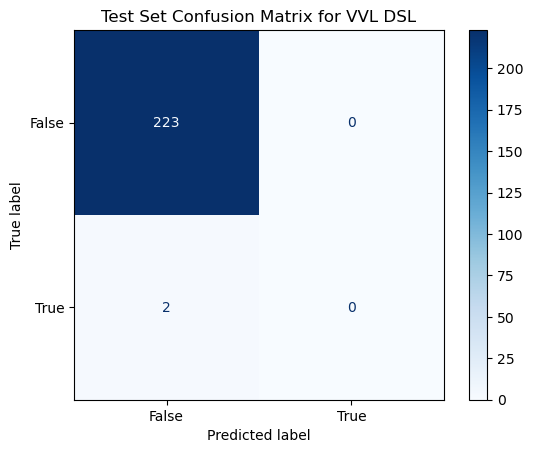

Training Set Confusion Matrix for VVL DSL:
[[892   0]
 [  4   0]]
Test Set Confusion Matrix for VVL DSL:
[[223   0]
 [  2   0]]
Overall Confusion Matrix for VVL DSL:
[[223   0]
 [  2   0]]


<Figure size 800x600 with 0 Axes>

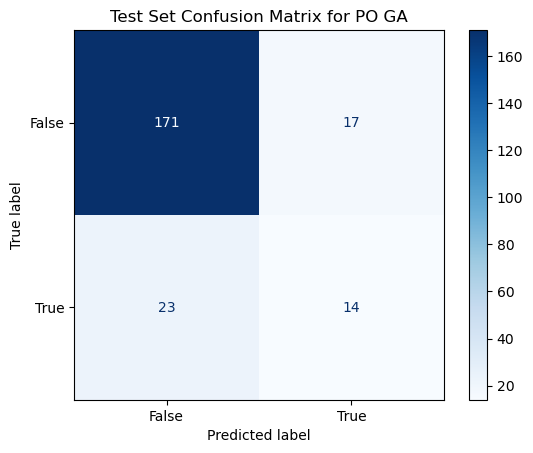

Training Set Confusion Matrix for PO GA:
[[763   9]
 [  1 123]]
Test Set Confusion Matrix for PO GA:
[[171  17]
 [ 23  14]]
Overall Confusion Matrix for PO GA:
[[171  17]
 [ 23  14]]


<Figure size 800x600 with 0 Axes>

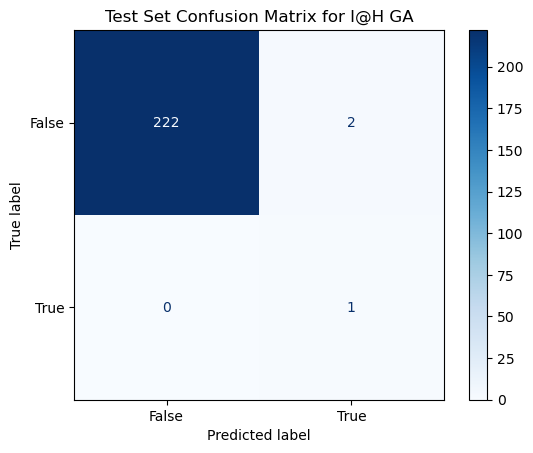

Training Set Confusion Matrix for I@H GA:
[[877   3]
 [  0  16]]
Test Set Confusion Matrix for I@H GA:
[[222   2]
 [  0   1]]
Overall Confusion Matrix for I@H GA:
[[222   2]
 [  0   1]]


<Figure size 800x600 with 0 Axes>

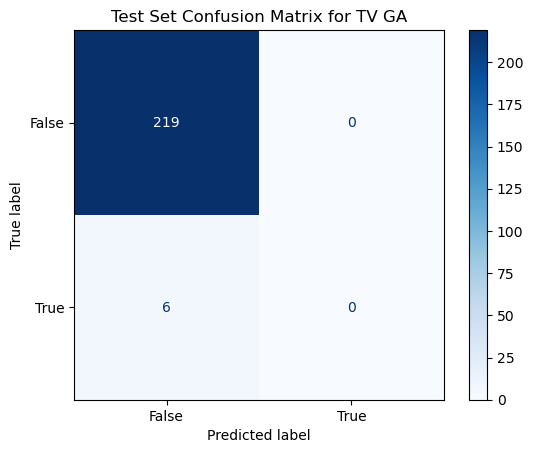

Training Set Confusion Matrix for TV GA:
[[889   0]
 [  7   0]]
Test Set Confusion Matrix for TV GA:
[[219   0]
 [  6   0]]
Overall Confusion Matrix for TV GA:
[[219   0]
 [  6   0]]


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize empty dataframes to store results
df_train_res = pd.DataFrame()
df_test_res = pd.DataFrame()
df_overall_res = pd.DataFrame()

for target_id in range(len(targets)):
    randomsearch_clf.fit(train_vectors, X_train[targets[target_id]])

    # Get predictions on the training set
    train_predictions = randomsearch_clf.best_estimator_.predict(train_vectors)

    # Get predictions on the test set
    test_predictions = randomsearch_clf.best_estimator_.predict(test_vectors)

    # Calculate confusion matrix for training set
    train_conf_matrix = confusion_matrix(X_train[targets[target_id]], train_predictions)

    # Calculate confusion matrix for test set
    test_conf_matrix = confusion_matrix(X_test[targets[target_id]], test_predictions)

    # Plot confusion matrix for test set
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(test_conf_matrix, display_labels=["False", "True"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Test Set Confusion Matrix for {targets[target_id]}')
    plt.show()

    # Calculate overall confusion matrix
    overall_conf_matrix = confusion_matrix(X_test[targets[target_id]], test_predictions)

    # Display the confusion matrices
    print(f"Training Set Confusion Matrix for {targets[target_id]}:")
    print(train_conf_matrix)

    print(f"Test Set Confusion Matrix for {targets[target_id]}:")
    print(test_conf_matrix)

    print(f"Overall Confusion Matrix for {targets[target_id]}:")
    print(overall_conf_matrix)

    # Continue with the rest of the code for classification report and accuracy calculation
    # (similar to the previous code)

    # Add target and model information to the dataframes
    # (similar to the previous code)

    # Concatenate the results to the main dataframes
    # (similar to the previous code)

    # Concatenate the confusion matrices to the respective dataframes
    df_train_res = pd.concat((df_train_res, pd.DataFrame(train_conf_matrix)), ignore_index=True)
    df_test_res = pd.concat((df_test_res, pd.DataFrame(test_conf_matrix)), ignore_index=True)
    df_overall_res = pd.concat((df_overall_res, pd.DataFrame(overall_conf_matrix)), ignore_index=True)


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your DataFrame with 'content' and target columns
features = ['content']
targets = ['VVL Mobile', 'VVL DSL', 'PO GA', 'I@H GA', 'TV GA']

# Split the data into training and testing sets
X_train, X_test = train_test_split(df[features + targets], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train['content'])
test_vectors = vectorizer.transform(X_test['content'])

# Initialize the Complement Naive Bayes classifier
complement_nb = ComplementNB()

# Train the classifier on the training data
for target in targets:
    print(f"Training Complement Naive Bayes for {target}")
    complement_nb.fit(train_vectors, X_train[target])

    # Make predictions on the test set
    predictions = complement_nb.predict(test_vectors)

    # Display classification report and confusion matrix for each target
    print(f"Classification Report for {target}:")
    print(classification_report(X_test[target], predictions))

    print(f"Confusion Matrix for {target}:")
    print(confusion_matrix(X_test[target], predictions))

# You can further analyze the results, and if needed, tune the model or adjust parameters.


Training Complement Naive Bayes for VVL Mobile
Classification Report for VVL Mobile:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       211
        True       0.00      0.00      0.00        14

    accuracy                           0.93       225
   macro avg       0.47      0.50      0.48       225
weighted avg       0.88      0.93      0.91       225

Confusion Matrix for VVL Mobile:
[[210   1]
 [ 14   0]]
Training Complement Naive Bayes for VVL DSL
Classification Report for VVL DSL:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       223
        True       0.00      0.00      0.00         2

    accuracy                           0.99       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.98      0.99      0.99       225

Confusion Matrix for VVL DSL:
[[223   0]
 [  2   0]]
Training Complement Naive Bayes for PO GA
Classification Report for PO GA